# Steps to follow

## 1. Setup and data creation
Import necessary libraries and create a synthetic dataset representing the relationship between monthly advertising spends (online and TV) and monthly revenue.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a synthetic dataset
np.random.seed(42)
n_samples = 1000
online_spend = np.random.uniform(1000, 10000, n_samples)
tv_spend = np.random.uniform(500, 5000, n_samples)
revenue = 5000 + 3 * online_spend + 2 * tv_spend + np.random.normal(0, 500, n_samples)
data = {'Online_Spend': online_spend, 'TV_Spend': tv_spend, 'Revenue': revenue}
dataset = pd.DataFrame(data)

## 2. Prepare the data

Define the independent variables `(X)` and the dependent variable `(Y)`.

Split the dataset into training and testing sets.

In [2]:
# Define independent and dependent variables
X = dataset[['Online_Spend', 'TV_Spend']]
Y = dataset['Revenue']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## 3. Model training

Create and fit the multiple linear regression model.

In [3]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## 4. Model evaluation
Make predictions and evaluate the model.

In [4]:
# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 399.1752393123967
Mean Squared Error: 258494.5796440375
Root Mean Squared Error: 508.42362223252127


## 5. Visualisation

Plot the actual vs predicted values.

Text(0.5, 0.92, '3D Plot of Revenue, Online Spend, and TV Spend')

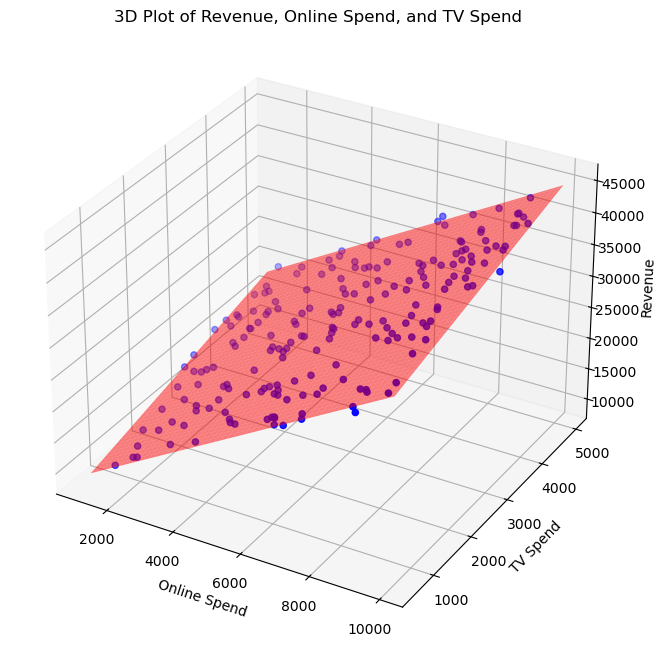

In [5]:
# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values
ax.scatter(X_test['Online_Spend'], X_test['TV_Spend'], Y_test, color='blue', label='Actual Revenue')

# Surface plot for predicted values
x_surf = np.linspace(X_test['Online_Spend'].min(), X_test['Online_Spend'].max(), 100)
y_surf = np.linspace(X_test['TV_Spend'].min(), X_test['TV_Spend'].max(), 100)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)
ax.set_xlabel('Online Spend')
ax.set_ylabel('TV Spend')
ax.set_zlabel('Revenue')
ax.set_title('3D Plot of Revenue, Online Spend, and TV Spend')

If you follow the steps correct, your 3D plot should look like this.

In [6]:
plt.show()